<h1> Objective:- Assessment Task 2: Problem solving task. </h1>

<div style="text-align: right"> Owner: <b>Karan Murjani </b> </div>

<h6> Importing all the required libraries </h6>

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from kmodes.kmodes import KModes
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix,classification_report, silhouette_score
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir('/Users/karanmurjani/Downloads/Study/Trimester 2/SIT720 - Machine Learning/Assignment 2/')

<b> Q1) Determine the number of subgroups from the dataset using attributes 3 to 205 i.e., exclude attributes 1, 2 and 206. Is this number same as number of classes presented by attribute 206? Explain and justify your findings. </b>

In [2]:
#Loading Data
scadi_df=pd.read_csv('SCADI-Dataset/SCADI.csv')
print(scadi_df.shape)
scadi_df.head()

(70, 206)


,Gender,Age,d 5100-0,d 5100-1,d 5100-2,d 5100-3,d 5100-4,d 5100-8,d 5100-9,d 5101-0,d 5101-1,d 5101-2,d 5101-3,d 5101-4,d 5101-8,d 5101-9,d 5102-0,d 5102-1,d 5102-2,d 5102-3,d 5102-4,d 5102-8,d 5102-9,d 5200-0,d 5200-1,d 5200-2,d 5200-3,d 5200-4,d 5200-8,d 5200-9,d 5201-0,d 5201-1,d 5201-2,d 5201-3,d 5201-4,d 5201-8,d 5201-9,d 5202-0,d 5202-1,d 5202-2,d 5202-3,d 5202-4,d 5202-8,d 5202-9,d 5203-0,d 5203-1,d 5203-2,d 5203-3,d 5203-4,d 5203-8,d 5203-9,d 5204-0,d 5204-1,d 5204-2,d 5204-3,d 5204-4,d 5204-8,d 5204-9,d 5205-0,d 5205-1,d 5205-2,d 5205-3,d 5205-4,d 5205-8,d 5205-9,d 53000-0,d 53000-1,d 53000-2,d 53000-3,d 53000-4,d 53000-8,d 53000-9,d 53001-0,d 53001-1,d 53001-2,d 53001-3,d 53001-4,d 53001-8,d 53001-9,d 53010-0,d 53010-1,d 53010-2,d 53010-3,d 53010-4,d 53010-8,d 53010-9,d 53011-0,d 53011-1,d 53011-2,d 53011-3,d 53011-4,d 53011-8,d 53011-9,d 5302-0,d 5302-1,d 5302-2,d 5302-3,d 5302-4,d 5302-8,d 5302-9,d 5400-0,d 5400-1,d 5400-2,d 5400-3,d 5400-4,d 5400-8,d 5400-9,d 5401-0,d 5401-1,d 5401-2,d 5401-3,d 5401-4,d 5401-8,d 5401-9,d 5402-0,d 5402-1,d 5402-2,d 5402-3,d 5402-4,d 5402-8,d 5402-9,d 5403-0,d 5403-1,d 5403-2,d 5403-3,d 5403-4,d 5403-8,d 5403-9,d 5404-0,d 5404-1,d 5404-2,d 5404-3,d 5404-4,d 5404-8,d 5404-9,d 5500-0,d 5500-1,d 5500-2,d 5500-3,d 5500-4,d 5500-8,d 5500-9,d 5501-0,d 5501-1,d 5501-2,d 5501-3,d 5501-4,d 5501-8,d 5501-9,d 5600-0,d 5600-1,d 5600-2,d 5600-3,d 5600-4,d 5600-8,d 5600-9,d 5602-0,d 5602-1,d 5602-2,d 5602-3,d 5602-4,d 5602-8,d 5602-9,d 5700-0,d 5700-1,d 5700-2,d 5700-3,d 5700-4,d 5700-8,d 5700-9,d 5701-0,d 5701-1,d 5701-2,d 5701-3,d 5701-4,d 5701-8,d 5701-9,d 57020-0,d 57020-1,d 57020-2,d 57020-3,d 57020-4,d 57020-8,d 57020-9,d 57021-0,d 57021-1,d 57021-2,d 57021-3,d 57021-4,d 57021-5,d 57021-6,d 57022-0,d 57022-1,d 57022-2,d 57022-3,d 57022-4,d 57022-8,d 57022-9,d 571-0,d 571-1,d 571-2,d 571-3,d 571-4,d 571-8,d 571-9,Classes
0,0,18,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,class6
1,0,22,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,class6
2,0,18,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,class6
3,1,18,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,class6
4,0,19,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,class6


In [3]:
#Checking if there is any null values.
def check_missing(df):
    null_val = df.isnull().sum()
    percent = 100 * df.isnull().sum()/len(df)
    missing_table = pd.concat([null_val, percent], axis=1)
    col = missing_table.rename(columns = {0 : 'Num', 1 : 'Rate'})
    return col

# Display columns missing values are under 1%.
print("Number of rows :- "+str(len(scadi_df)))
cols = check_missing(scadi_df)
cols.sort_values(by="Rate", ascending=False).head(10)

Number of rows :- 70


,Num,Rate
Gender,0,0.0
d 5500-9,0,0.0
d 5404-3,0,0.0
d 5404-4,0,0.0
d 5404-8,0,0.0
d 5404-9,0,0.0
d 5500-0,0,0.0
d 5500-1,0,0.0
d 5500-2,0,0.0
d 5500-3,0,0.0


In [4]:
#Check data types
scadi_df.dtypes.head()

Gender      int64
Age         int64
d 5100-0    int64
d 5100-1    int64
d 5100-2    int64
dtype: object

In [5]:
#Number of unique classes in Classes column
unique_classes = scadi_df['Classes'].nunique()
print('Number of unique classes are :- ',unique_classes)
scadi_df['Classes'].value_counts()

Number of unique classes are :-  7


class6    29
class7    16
class4    12
class2     7
class5     3
class1     2
class3     1
Name: Classes, dtype: int64

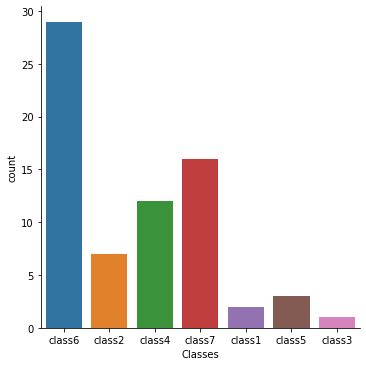

In [6]:
#Classes distribution
sns.factorplot("Classes", data=scadi_df, kind="count")
plt.show()

<h6> Scaling the data with MinMax Scaling

In [7]:
minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(scadi_df.iloc[:,:205]) #Scaling excluding classes attribute.
minmax_df = pd.DataFrame(minmax_df, columns =scadi_df.iloc[:,:205].columns)
minmax_df.drop(columns={'Gender', 'Age'}, inplace=True)
print(minmax_df.shape)

(70, 203)


<h3> Applying KMeans clustering and finding the optimal number of clusters

For n_clusters = 2 The average Silhouette score is : 0.37388951718071634
For n_clusters = 3 The average Silhouette score is : 0.423350754496437
For n_clusters = 4 The average Silhouette score is : 0.43464480396278166
For n_clusters = 5 The average Silhouette score is : 0.4156648797494486
For n_clusters = 6 The average Silhouette score is : 0.44033987647476547
For n_clusters = 7 The average Silhouette score is : 0.3619332615321408
For n_clusters = 8 The average Silhouette score is : 0.30301544505419026
For n_clusters = 9 The average Silhouette score is : 0.33982910347307915
For n_clusters = 10 The average Silhouette score is : 0.32429043774637145
For n_clusters = 11 The average Silhouette score is : 0.31807836096983977
Optimal value of k with KneeLocator is 4.


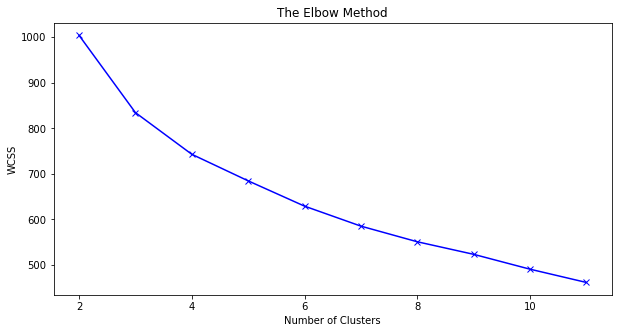

Optimal value of k is 4.
There are 4 clusters and 7 unique classes in classes column so it is not same.


In [8]:
wcss = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=200, max_iter=500)
    cluster_labels = kmeans.fit_predict(minmax_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    silhouette_avg = silhouette_score(minmax_df, cluster_labels, metric='manhattan', random_state=200)
    print("For n_clusters =", k, "The average Silhouette score is :", silhouette_avg)

k = KneeLocator(range(2,12), wcss, curve='convex', direction='decreasing')
print(f'Optimal value of k with KneeLocator is {k.elbow}.')
 
plt.figure(figsize=(10,5))
plt.plot(range(2,12), wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

optimal_k = KneeLocator(range(2,12), wcss, curve='convex', direction='decreasing')
print(f'Optimal value of k is {optimal_k.elbow}.')
print(f'There are {optimal_k.elbow} clusters and {unique_classes} unique classes in classes column so it is not same.')

<b> So here we can see that number of subgroups/clusters in our dataset is not same as number of classes in "Classes" column

<br>Silhouette method showing 4 cluster as optimal clusters, </br>
<br>Elbow method showing 5 cluster and </br>
<br> KneeLocator showing 4 clusters as optimal. </br>

<b> Q2) Is this data facing curse of dimensionality? If so, then how to solve this problem. Explain with a two-
dimensional plot and report relevant loss of information. 

In [9]:
#Applying PCA and reducing into two components.
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(scadi_df.iloc[:,:205]) #Scaling excluding classes attribute.
minmax_df = pd.DataFrame(minmax_data, columns =scadi_df.iloc[:,:205].columns)
pca = PCA(n_components=2, random_state=10)
principal_components = pca.fit_transform(minmax_df)
print(principal_components.shape)

#Variance matrix
variance=pca.explained_variance_ratio_
print('Total variance captured by 1st and 2nd Principal components: ', variance)

(70, 2)
Total variance captured by 1st and 2nd Principal components:  [0.26522695 0.14722755]


[26.5 41.2]


(1.0, 2.0)

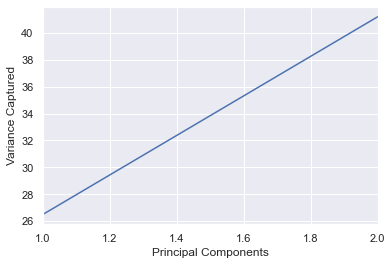

In [10]:
#Cumulative variance captured
cum_variance=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
print(cum_variance)
cumsum_df = pd.DataFrame(cum_variance,columns=list('A'))
cumsum_df['PrincipalComponents'] = cumsum_df.index +1
cumsum_df.rename(columns={'A':'VarianceCaptured'}, inplace=True)

#Plotting variance captured for 2 principal components
sns.set(style='darkgrid')
ax = sns.lineplot(data=cumsum_df, x='PrincipalComponents', y='VarianceCaptured')
ax.set(xlabel='Principal Components', ylabel='Variance Captured')
ax.set_xlim(1,2)

In [11]:
principal_components_df = pca.inverse_transform(principal_components)
print(principal_components_df.shape)

# Measuring Loss of Information.
rec_error = np.linalg.norm(minmax_df-principal_components_df, 'fro')/np.linalg.norm(minmax_df, 'fro')
print('Loss of information after reducing into two components is:- ',rec_error * 100)

(70, 205)
Loss of information after reducing into two components is:-  62.16102737672766


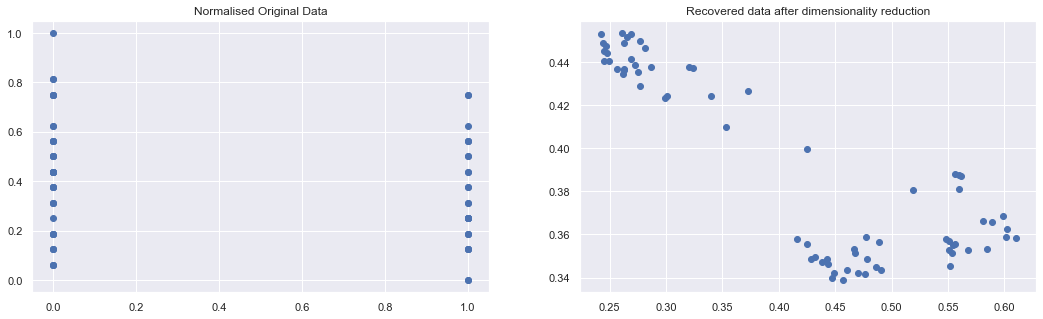

In [12]:
#Visualize the recovered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5)) # added size of each figs (width, height) fig.subplots_adjust(wspace=0.2) # leave some space between figs
axs[0].scatter(minmax_data[:,0], minmax_data[:,1])
axs[0].set_title("Normalised Original Data")
axs[1].scatter(principal_components_df[:,0], principal_components_df[:,1])
axs[1].set_title("Recovered data after dimensionality reduction")
plt.show()

In [13]:
#Total dimensions required to get 75% variance.
variance=[]
k,t=1,0
while k<=70:
    pca = PCA(n_components=k, whiten=True)
    new_pca = pca.fit_transform(minmax_df)
    var_75=sum(pca.explained_variance_ratio_)
    if var_75<=0.75:
        variance.append(var_75)    
    elif t==0:
        result=k
        print('Minimum dimension that captures at least 75% variance are', result)
        t=1
    else:
        variance.append(var_75)
        
    k+=1 

Minimum dimension that captures at least 75% variance are 10


In [14]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(minmax_df)
print(principal_components.shape)

principal_components_inverse = pca.inverse_transform(principal_components)
print(principal_components_inverse.shape)

# Measure the reconstruction error
rec_error = np.linalg.norm(minmax_df-principal_components_inverse, 'fro')/np.linalg.norm(minmax_df, 'fro')
print('Loss of information after reducing into 10 components:- ', rec_error*100)

(70, 10)
(70, 205)
Loss of information after reducing into 10 components:-  40.02000940272099


In [ ]:
#Cumulative variance captured
cum_variance=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
print('Variance captured by first 10 principal components is:- ', cum_variance)
cumsum_df = pd.DataFrame(cum_variance,columns=list('A'))
cumsum_df['PrincipalComponents'] = cumsum_df.index +1
cumsum_df.rename(columns={'A':'VarianceCaptured'}, inplace=True)

#Plotting variance captured for 2 principal components
sns.set(style='darkgrid')
ax = sns.lineplot(data=cumsum_df, x='PrincipalComponents', y='VarianceCaptured')
ax.set(xlabel='Principal Components', ylabel='Variance Captured')
# ax.set_xlim(1,3)

In [ ]:
features = range(pca.n_components_)
plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

<b> Q4) Create a machine learning (ML) model for predicting “weight” using all features except “NObeyesdad” and report observed performance. 

In [ ]:
obesity_df=pd.read_csv('obesity_levels.csv')
print(obesity_df.shape)
obesity_df.head()

In [ ]:
#Converting binary variables.
obesity_df['SMOKE'] = obesity_df['SMOKE'].map(dict(yes=1, no=0))
obesity_df['FAVC'] = obesity_df['FAVC'].map(dict(yes=1, no=0))
obesity_df['SCC'] = obesity_df['SCC'].map(dict(yes=1, no=0))
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].map(dict(yes=1, no=0))
obesity_df['Gender'] = obesity_df['Gender'].map(dict(Male=1, Female=0))

#Dummy variable creation
obesity_df1 = pd.get_dummies(obesity_df, columns={'CAEC', 'CALC', 'MTRANS'})
obesity_df1.drop(columns={'NObeyesdad', 'Weight'}, inplace=True)
obesity_df1['Weight'] = obesity_df['Weight']
bins = np.arange(obesity_df1['Weight'].min(), obesity_df1['Weight'].max(), 20)
bins = np.arange(obesity_df1['Weight'].min(), 100, 20)
weight_labels = [f"{i} - {i+20}" for i in list(bins[:-1])]
# obesity_df1 = obesity_df1.query('Weight<165') #Dropping outlier
obesity_df1['WeightBins'] = pd.cut(obesity_df1['Weight'], bins=bins, right=True, labels=weight_labels, include_lowest=True)
obesity_df1['WeightBins'] = np.where(obesity_df1['Weight'] >=99, "99+", obesity_df1['WeightBins'])
print(obesity_df1.shape)
obesity_df1.head()

In [ ]:
obesity_df1['WeightBins'].value_counts(dropna=False)

In [ ]:
obesity_df1.query('WeightBins!=WeightBins', engine='python')

In [ ]:
#Dividing data into train-test split.
X_train, X_test, y_train, y_test = train_test_split(obesity_df1.iloc[:,:-2], obesity_df1['Weight'], 
                                                    test_size=0.3, random_state=10)

minmax_data_train = minmax_scaler.fit_transform(X_train) #Scaling Train data
train_df = pd.DataFrame(minmax_data_train, columns =X_train.columns)
minmax_data_test = minmax_scaler.fit_transform(X_test) #Scaling Test data
test_df = pd.DataFrame(minmax_data_test, columns =X_test.columns)

In [ ]:
wcss = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k,n_init=15,random_state=200, max_iter=800)
    cluster_labels = kmeans.fit_predict(train_df)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(train_df, cluster_labels, metric='manhattan', random_state=200)
    print("For n_clusters =", k, "The average Silhouette score is :", silhouette_avg)

plt.figure(figsize=(20,10))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(2,20),wcss,"-o")
plt.grid(True)
plt.xlabel("Optimal Cluster",fontsize=14)
plt.ylabel("WCSS",fontsize=14)
plt.xticks(range(2,20))
plt.tight_layout()
plt.show()

In [ ]:
# find optimal value of k
from kneed import DataGenerator, KneeLocator
k = KneeLocator(range(2,20), wcss, curve='convex', direction='decreasing')
print(f'Optimal value of k is {k.elbow}.')

Different method showing different optimal clusters but we go ahead 18 cluster by looking at elbow method and silhouette method

In [ ]:
kmeans = KMeans(n_clusters=15, n_init=15,random_state=200, max_iter=800)
kmeans.fit(train_df)
identified_clusters = kmeans.fit_predict(train_df)
obesity_df3 = pd.DataFrame(minmax_data_train, columns=list(train_df.columns), index=X_train.index)
obesity_df3['Cluster'] = pd.Series(identified_clusters, index=obesity_df3.index)
obesity_df3 = pd.merge(obesity_df3,y_train, how = 'left',left_index = True, right_index = True)
print(obesity_df3.shape)
obesity_df3.head()

### Option 1 : Considering weight as continous

In [ ]:
obesity_df3_dict = obesity_df3.groupby('Cluster').agg({'Weight':'mean'}).rename(columns={'Weight':'Avg_Weight'}).reset_index()
obesity_df4 = pd.merge(obesity_df3, obesity_df3_dict, on='Cluster', how='left')
print(obesity_df3_dict.shape)
print(obesity_df4.shape)
obesity_df4.head()

Predicting cluster number of testing data 

In [ ]:
identified_clusters = kmeans.fit_predict(test_df)
obesity_test_df = pd.DataFrame(minmax_data_test, columns=list(X_test.columns), index=X_test.index)
obesity_test_df['Cluster'] = pd.Series(identified_clusters, index=obesity_test_df.index)
print(obesity_test_df.shape)
obesity_test_df.head()

In [ ]:
#Getting the average weight values for test data
pred_df = pd.merge(obesity_test_df, obesity_df3_dict, on='Cluster', how='left')
print(pred_df.shape)
pred_df.head()

Performance metrics

In [ ]:
print('Performance metric for Training data:-')
print('-----------------------------------------')
print("MSE",mean_squared_error(obesity_df4['Weight'],obesity_df4['Avg_Weight']))

print("RMSE",np.sqrt(mean_squared_error(obesity_df4['Weight'],obesity_df4['Avg_Weight'])))

print("MAE",mean_absolute_error(obesity_df4['Weight'],obesity_df4['Avg_Weight']))

print("R2 Score",r2_score(obesity_df4['Weight'],obesity_df4['Avg_Weight']))

In [ ]:
print('Performance metric for Testing data:-')
print('-----------------------------------------')
print("MSE",mean_squared_error(y_test,pred_df['Avg_Weight']))

print("RMSE",np.sqrt(mean_squared_error(y_test,pred_df['Avg_Weight'])))

print("MAE",mean_absolute_error(y_test,pred_df['Avg_Weight']))

print("R2 Score",r2_score(y_test,pred_df['Avg_Weight']))

<h4> Conclusion: - As we can see R2 Score is very low for test data and 53% for train data so we can say that it is not ideal model as it gives very vague output. Ideally we should be using Supervised model for this kind of problem.

### Option 2 - Binning weight into bins and taking the mode of them for every cluster

In [ ]:
ax= sns.countplot(data=obesity_df1, x='WeightBins')
ax.set_xlabel('Weight Bins')
ax.set_title('Weight Bins distribution')
ax.set_ylabel('Count')

In [ ]:
#Dividing data into train-test split.
X_train, X_test, y_train, y_test = train_test_split(obesity_df1.iloc[:,:-2], obesity_df1['WeightBins'], 
                                                    test_size=0.3, random_state=10)

minmax_data_train = minmax_scaler.fit_transform(X_train) #Scaling Train data
train_df = pd.DataFrame(minmax_data_train, columns =X_train.columns)
minmax_data_test = minmax_scaler.fit_transform(X_test) #Scaling Test data
test_df = pd.DataFrame(minmax_data_test, columns =X_test.columns)

In [ ]:
kmeans = KMeans(n_clusters=15,n_init=15,random_state=200, max_iter=800)
kmeans.fit(train_df)
identified_clusters = kmeans.fit_predict(train_df)
obesity_df5 = pd.DataFrame(minmax_data_train, columns=list(train_df.columns), index=X_train.index)
obesity_df5['Cluster'] = pd.Series(identified_clusters, index=obesity_df5.index)
obesity_df5 = pd.merge(obesity_df3,y_train, how = 'left',left_index = True, right_index = True)
print(obesity_df5.shape)
obesity_df5.head()

In [ ]:
ax= sns.countplot(data=obesity_df5, x='WeightBins', hue='Cluster', palette='magma')
sns.set(rc={'figure.figsize':(20,20)})
ax.set_xlabel('Weight Bins')
ax.set_title('Weight Bins across different Clusters')
ax.set_ylabel('Count')

In [ ]:
obesity_df4_dict = obesity_df5.groupby('Cluster').agg({'WeightBins':pd.Series.mode}).rename(columns={'WeightBins':'Avg_WeightBins'}).reset_index()
obesity_df5 = pd.merge(obesity_df5, obesity_df4_dict, on='Cluster', how='left')
print(obesity_df4_dict.shape)
print(obesity_df5.shape)

In [ ]:
identified_clusters = kmeans.fit_predict(test_df)
obesity_test_df = pd.DataFrame(minmax_data_test, columns=list(X_test.columns), index=X_test.index)
obesity_test_df['Cluster'] = pd.Series(identified_clusters, index=obesity_test_df.index)
print(obesity_test_df.shape)
obesity_test_df.head()

In [ ]:
#Getting the average weight bins for test data
pred_df1 = pd.merge(obesity_test_df, obesity_df4_dict, on='Cluster', how='left')
print(pred_df1.shape)
pred_df1.head()

Performance metrics

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df['WeightBins'].shape

In [ ]:
print('Performance metrics for Training model:-')
print('-------------------------------------------')

print('Confusion Matrix:- ')
print(confusion_matrix(obesity_df5['WeightBins'], obesity_df5['Avg_WeightBins']))
print('-------------------------------------------')
print('Classification Report:- ')
print(classification_report(obesity_df5['WeightBins'], obesity_df5['Avg_WeightBins']))

In [ ]:
print('Performance metrics for Testing model:-')
print('-------------------------------------------')

print('Confusion Matrix:- ')
print(confusion_matrix(y_test_df, pred_df1['Avg_WeightBins']))
print('-------------------------------------------')
print('Classification Report:- ')
print(classification_report(y_test_df,pred_df1['Avg_WeightBins']))

<b> As we can see that the accuracy of our model is just 29% and ideally we should not be using unsupervised learning model. 
    
Train accuracy is 60% whereas test accuracy is 29% so we can say that our model learns well for training data but doesn't give good result for testing data. We can say that it is the case of overfitting.

<b> Q5) Create a ML model for classifying subjects into two classes applying following constraints on above dataset. Use “NObeyesdad” as target variable and rest of them as predictor variables. 
<br> •	drop samples with value “Insufficient Weight” for “NObeyesdad” </br>
<br> •	Group Normal Weight, Overweight Level I, and Overweight Level II into a class, and the other three labels (Obesity Type I, II, III) as the other class. </br>


In [ ]:
obesity_df6 = obesity_df1.iloc[:,:-1].copy()
obesity_df6['NObeyesdad'] = obesity_df['NObeyesdad']
print(obesity_df6.shape)
obesity_df6.head()

In [ ]:
#Dropping Insufficient weight samples
obesity_df6 = obesity_df6.query('NObeyesdad!="Insufficient_Weight"')#Dropping Insufficient_Weight samples

#Grouping target variable.
obesity_df6['Target'] = np.where((obesity_df6['NObeyesdad'] == "Normal_Weight") | (obesity_df6['NObeyesdad'] == "Overweight_Level_I")
                                 | (obesity_df6['NObeyesdad'] =="Overweight_Level_II"), "0", "1")
print(obesity_df6.shape)
obesity_df6.head()

In [ ]:
ax= sns.countplot(data=obesity_df6, x='Target')
ax.set_xlabel('Class')
ax.set_title('Class distribution across data')
ax.set_ylabel('Count')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(obesity_df6.iloc[:,:-2], obesity_df6['Target'], 
                                                    test_size=0.3, random_state=10)

minmax_data_train = minmax_scaler.fit_transform(X_train) #Scaling Train data
train_df = pd.DataFrame(minmax_data_train, columns =X_train.columns)
minmax_data_test = minmax_scaler.fit_transform(X_test) #Scaling Test data
test_df = pd.DataFrame(minmax_data_test, columns =X_test.columns)

In [ ]:
wcss = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=200, max_iter=500)
    cluster_labels = kmeans.fit_predict(train_df)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(train_df, cluster_labels, metric='manhattan', random_state=10)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

plt.figure(figsize=(20,10))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(2,20),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(2,20))
plt.tight_layout()
plt.show()

In [ ]:
#Applying 15 cluster model to our data and predicting the cluster number
kmeans = KMeans(n_clusters=14,init='k-means++', n_init=20,random_state=200)
cluster_labels = kmeans.fit_predict(train_df)    
obesity_df7 = pd.DataFrame(minmax_data_train, columns=list(train_df), index=X_train.index)
obesity_df7['Cluster'] = pd.Series(cluster_labels, index=obesity_df7.index)
obesity_df7 = pd.merge(obesity_df7,y_train, how = 'left',left_index = True, right_index = True)

In [ ]:
obesity_df7_dict = obesity_df7.groupby('Cluster').agg({'Target':pd.Series.mode}).rename(columns={'Target':'Mode_Target'}).reset_index()
obesity_df8 = pd.merge(obesity_df7, obesity_df7_dict, on='Cluster', how='left')
print(obesity_df7_dict.shape)
print(obesity_df8.shape)
obesity_df8.head(1)

In [ ]:
identified_clusters = kmeans.fit_predict(test_df)
obesity_test_df = pd.DataFrame(minmax_data_test, columns=list(X_test.columns), index=X_test.index)
obesity_test_df['Cluster'] = pd.Series(identified_clusters, index=obesity_test_df.index)
print(obesity_test_df.shape)
obesity_test_df.head()

In [ ]:
#Getting the average weight bins for test data
pred_df = pd.merge(obesity_test_df, obesity_df7_dict, on='Cluster', how='left')
print(pred_df.shape)
pred_df.head()

In [ ]:
print('Performance metrics for Training model:-')
print('-------------------------------------------')

print('Confusion Matrix:- ')
print(confusion_matrix(obesity_df8['Target'], obesity_df8['Mode_Target']))
print('-------------------------------------------')
print('Classification Report:- ')
print(classification_report(obesity_df8['Target'], obesity_df8['Mode_Target']))

In [ ]:
print('Performance metrics for Testing model:-')
print('-------------------------------------------')

print('Confusion Matrix:- ')
print(confusion_matrix(y_test, pred_df['Mode_Target']))
print('-------------------------------------------')
print('Classification Report:- ')
print(classification_report(y_test, pred_df['Mode_Target']))

<b> Here our model gives us 64% accuracy which is decent enough.

-> Train accuracy is 74% and test accuracy is 64 which is fine and we can't say that our model is overfitting or underfitting.
<br> -> 216 samples were predicted as Class0 out of 251 samples. 35 were wrongly predicted as Class1 which were actually of Class0.
<br> -> 140 samples were predicted as Class1 out of 301 samples. 161 were wrongly predicted as Class 0 which were actually of Class1.

<h4> Model 2: KModes Clustering

In [ ]:
# Elbow curve to find optimal K
cost = []
for num_clusters in range(2,20,2):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", verbose=1, random_state=200)
    kmode.fit_predict(train_df)
    cost.append(kmode.cost_)
    
plt.plot(range(2,20,2), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
km_cao = KModes(n_clusters=10, init = "Cao", random_state=200)
fitClusters_cao = km_cao.fit_predict(train_df)
obesity_df9 = pd.DataFrame(minmax_data_train, columns=list(train_df), index=X_train.index)
obesity_df9['Cluster'] = pd.Series(fitClusters_cao, index=obesity_df9.index)
obesity_df9 = pd.merge(obesity_df9,y_train, how = 'left',left_index = True, right_index = True)

In [ ]:
obesity_df9_dict = obesity_df9.groupby('Cluster').agg({'Target':pd.Series.mode}).rename(columns={'Target':'Mode_Target'}).reset_index()
obesity_df10 = pd.merge(obesity_df9, obesity_df9_dict, on='Cluster', how='left')
print(obesity_df9_dict.shape)
print(obesity_df10.shape)
obesity_df10.head(1)

In [ ]:
identified_clusters = km_cao.fit_predict(test_df)
obesity_test_df = pd.DataFrame(minmax_data_test, columns=list(X_test.columns), index=X_test.index)
obesity_test_df['Cluster'] = pd.Series(identified_clusters, index=obesity_test_df.index)
print(obesity_test_df.shape)
obesity_test_df.head()

In [ ]:
#Getting Target
pred_df = pd.merge(obesity_test_df, obesity_df9_dict, on='Cluster', how='left')
print(pred_df.shape)
pred_df.head()

In [ ]:
print('Performance metrics for Training model:-')
print('-------------------------------------------')

print('Confusion Matrix:- ')
print(confusion_matrix(obesity_df10['Target'], obesity_df10['Mode_Target']))
print('-------------------------------------------')
print('Classification Report:- ')
print(classification_report(obesity_df10['Target'], obesity_df10['Mode_Target']))

In [ ]:
print('Performance metrics for Testing model:-')
print('-------------------------------------------')

print('Confusion Matrix:- ')
print(confusion_matrix(y_test, pred_df['Mode_Target']))
print('-------------------------------------------')
print('Classification Report:- ')
print(classification_report(y_test, pred_df['Mode_Target']))

<b> Here our model gave us 62% accuracy which is not better than our previous model.
    
<br> -> Train accuracy was 70% whereas 62% test accuracy.
<br> -> 131 samples were predicted as Class0 out of 251 samples. 120 were wrongly predicted as Class1 which were actually of Class0.
<br> -> 213 samples were predicted as Class1 out of 301 samples. 88 were wrongly predicted as Class 0 which were actually of Class1.


<b> Q6) Suppose that a company has a number (>=500) of resorts around the globe. 

a. Identify a list of features (>=5) that can be used to describe these resorts.
<br> b. Create a dataset (rows>=500) and explain all variables. You can generate data either synthetically
or collecting from similar datasets. Submit your created dataset. In addition, please provide links
in case you have collected the dataset.
<br> c. Build a ML model that can help a customer to select appropriate set of resorts based on the
season of travel. Present and describe the performance of your model.
<br> d. Why do we need a ML model for this problem?

In [ ]:
season = ['Spring', 'Summer', 'Autumn', 'Winter']
Season = [0,1,2,3,4]
Rating = [1,2,3,4,5,6,7,8,9,10]
Part = ['East', 'West', 'North', 'South']

resort_df = pd.DataFrame(np.random.choice([0,1],size=(1000, 4)), columns=list('ABCD'))
resort_df.rename(columns={'A':'RESTAURANT_VEG_NON_VEG', 'B':'GYM_AVAILABLE', 'C':'SPORTS_CLUB', 
                         'D':'AIRPORT_NEARBY'}, inplace=True)
resort_df['AVG_COST'] = np.random.uniform(50, 50000, 1000)
resort_df['RATING'] = np.random.choice(Rating, 1000)
resort_df['GEO_PART'] = np.random.choice(Part, 1000)
resort_df['SEASON_PREFFERED'] = np.random.choice(season, 1000)
print(resort_df.shape)
resort_df.head()

In [ ]:
#EDA
resort_df = pd.get_dummies(resort_df, columns={'GEO_PART', 'SEASON_PREFFERED'})
print(resort_df.shape)
resort_df.head()

In [ ]:
#Applying KMeans clustering
wcss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=200, max_iter=500)
    cluster_labels = kmeans.fit_predict(resort_df)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(resort_df, cluster_labels, metric='manhattan', random_state=200)
    print("For n_clusters =", k, "The average Silhouette score is :", silhouette_avg)

k = KneeLocator(range(2,10), wcss, curve='concave', direction='decreasing')
print(f'Optimal value of k is {k.elbow}.')


plt.figure(figsize=(20,10))
plt.title("Elbow Method", fontsize=18)
plt.plot(range(2,10),wcss,"-o")
plt.grid(True)
plt.xlabel("Optimal Cluster",fontsize=14)
plt.ylabel("WCSS",fontsize=14)
plt.xticks(range(2,10))
plt.tight_layout()
plt.show()

In [ ]:
#We go ahead with 4 clusters.
kmeans = KMeans(n_clusters=4, init="k-means++",random_state=200, max_iter=400)
kmeans.fit(resort_df)
identified_clusters = kmeans.fit_predict(resort_df)
resort_pred_df = pd.DataFrame(resort_df, columns=list(resort_df.columns), index=resort_df.index)
resort_pred_df['Cluster'] = pd.Series(identified_clusters, index=resort_pred_df.index)
print(resort_pred_df.shape)
resort_pred_df.head()

In [ ]:
cluster1 = resort_pred_df.query('Cluster==0')
print(cluster1.shape)
cluster2 = resort_pred_df.query('Cluster==1')
print(cluster2.shape)
cluster3 = resort_pred_df.query('Cluster==2')
print(cluster3.shape)
cluster4 = resort_pred_df.query('Cluster==3')
print(cluster4.shape)

<b> Cluster 1 :- 
    <br> All the resort having average rating close to 5 and Average cost around 43920$. </br>
    <br> 37 resorts were selected in Autumn, 74 resorts were preferred in Spring, 56 resort in Summer and 62 were preferred in Winter. </br>
    <br> Most of the resort are from East and West region. </br>
    

<br> Cluster 2 :- </br>
    <br> All the resort having average rating close to 3 and Average cost around 3616$. </br>
    <br> 53 resorts were selected in Autumn, 67 resorts were preferred in Spring, 77 resort in Summer and 57 were preferred in Winter. </br>
    <br> Most of the resort are from South region.
    

<br> Cluster 3 :- </br>
    <br> All the resort having average rating close to 6 and Average cost around 30658$. </br>
    <br> 60 resorts were selected in Autumn, 67 resorts were preferred in Spring, 64 resort in Summer and 66 were preferred in Winter. </br>
    <br> Most of the resort are from South and West region.

    

<br> Cluster 4 :- </br>
    <br> All the resort having average rating close to 6 and Average cost around 5992$. </br>
    <br> 56 resorts were selected in Autumn, 59 resorts were preferred in Spring, 61 resort in Summer and 65 were preferred in Winter. </br>
    <br> Most of the resort are from East region.

![Alt Text](https://tenor.com/view/mission-accomplished-high-five-nice-one-nice-well-done-gif-15556086.gif)